https://en.wikipedia.org/wiki/Tf%E2%80%93idf


In [70]:
import gzip, pickle
import numpy as np
import pandas as pd
from IPython.display import HTML

In [71]:
corpus = [
    "The sun is warm, warm, warm!",
    "The coldest winters last forever",
    "Cooling off in the pool is nice",
    "Summer is warmer than winter. It is the warmest.",
    "The coldest beer is the best beer"
]

# Term Frequency

# Tokenizing

In [199]:
from sklearn.feature_extraction.text import CountVectorizer

In [200]:
vectorizer = CountVectorizer()
tf = vectorizer.fit_transform(corpus)
tf

<5x21 sparse matrix of type '<class 'numpy.int64'>'
	with 29 stored elements in Compressed Sparse Row format>

In [201]:
print('number of features:', len(vectorizer.get_feature_names()))
print(vectorizer.get_feature_names())

number of features: 21
['beer', 'best', 'coldest', 'cooling', 'forever', 'in', 'is', 'it', 'last', 'nice', 'off', 'pool', 'summer', 'sun', 'than', 'the', 'warm', 'warmer', 'warmest', 'winter', 'winters']


In [202]:
tf.toarray()

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 3, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0],
       [2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]], dtype=int64)

## Stop Words

In [203]:
vectorizer = CountVectorizer(stop_words='english')
tf = vectorizer.fit_transform(corpus)
tf

<5x14 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [77]:
print('number of features:', len(vectorizer.get_feature_names()))
print(vectorizer.get_feature_names())

number of features: 14
['beer', 'best', 'coldest', 'cooling', 'forever', 'nice', 'pool', 'summer', 'sun', 'warm', 'warmer', 'warmest', 'winter', 'winters']


In [78]:
tf.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0],
       [2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

## Stemming

In [79]:
stem_words = ['warm', 'warmer', 'warmest', 'warming', 'warmed', 'lying', 'lied', 'fairly']

In [80]:
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer

In [81]:
stemmer = SnowballStemmer('english')
list(map(stemmer.stem, stem_words))

['warm', 'warmer', 'warmest', 'warm', 'warm', 'lie', 'lie', 'fair']

In [82]:
stemmer = PorterStemmer()
list(map(stemmer.stem, stem_words))

['warm', 'warmer', 'warmest', 'warm', 'warm', 'lie', 'lie', 'fairli']

In [83]:
stemmer = LancasterStemmer()
list(map(stemmer.stem, stem_words))

['warm', 'warm', 'warmest', 'warm', 'warm', 'lying', 'lied', 'fair']

In [84]:
ss = SnowballStemmer('english')
ls = LancasterStemmer()

list(map(ls.stem, map(ss.stem, stem_words)))

['warm', 'warm', 'warmest', 'warm', 'warm', 'lie', 'lie', 'fair']

### Vectorize with stemmer

In [85]:
import re

default_tokenizer = CountVectorizer().build_tokenizer()

def stemmed_tokenizer(doc):
    tokens = default_tokenizer(doc)
    return list(map(ls.stem, map(ss.stem, tokens)))

In [86]:
vectorizer = CountVectorizer(stop_words='english', tokenizer=stemmed_tokenizer)
tf = vectorizer.fit_transform(corpus)
tf

<5x12 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [87]:
print('number of features:', len(vectorizer.get_feature_names()))
print(vectorizer.get_feature_names())
tf.toarray()

number of features: 12
['beer', 'best', 'coldest', 'cool', 'forev', 'nic', 'pool', 'sum', 'sun', 'warm', 'warmest', 'wint']


array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1],
       [2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

### Similarity between documents

In [88]:
from sklearn.metrics.pairwise import cosine_similarity

In [89]:
similarities = cosine_similarity(tf)
similarities

array([[ 1.        ,  0.        ,  0.        ,  0.47434165,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.28867513,  0.23570226],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.47434165,  0.28867513,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.23570226,  0.        ,  0.        ,  1.        ]])

#### Plot the similarities

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


0 The sun is warm, warm, warm!
1 The coldest winters last forever
2 Cooling off in the pool is nice
3 Summer is warmer than winter. It is the warmest.
4 The coldest beer is the best beer


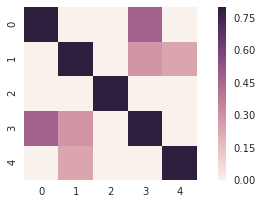

In [90]:
#http://seaborn.pydata.org/examples/network_correlations.html?highlight=correlation

import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 3))

# Draw the heatmap using seaborn
sns.heatmap(similarities, vmax=.8, square=True)

f.tight_layout()

for i, v in enumerate(corpus):
    print(i, v)

### Similarity to test document

In [115]:
features = vectorizer.get_feature_names()
features

['beer',
 'best',
 'coldest',
 'cool',
 'forev',
 'nic',
 'pool',
 'sum',
 'sun',
 'warm',
 'warmest',
 'wint']

In [182]:
test_doc = "I like sun and beer by the pool"

In [183]:
test_doc_vector = vectorizer.transform([test_doc])

In [184]:
test_doc_vector.toarray()

array([[1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]])

In [185]:
features_ixs = list(test_doc_vector.nonzero()[1])

#### Features common training set and test document

In [186]:
[features[ix] for ix in features_ixs]

['beer', 'pool', 'sun']

#### Distance

In [187]:
sims = cosine_similarity(test_doc_vector, tf)[0]
print(sims)

[ 0.18257419  0.          0.33333333  0.          0.47140452]


In [188]:
ordered_ixs = np.argsort(sims)[::-1]

In [190]:
print(ordered_ixs)

[4 2 0 3 1]


In [191]:
for ix in ordered_ixs:
    print(sims[ix], '\t', corpus[ix])

0.471404520791 	 The coldest beer is the best beer
0.333333333333 	 Cooling off in the pool is nice
0.182574185835 	 The sun is warm, warm, warm!
0.0 	 Summer is warmer than winter. It is the warmest.
0.0 	 The coldest winters last forever


# Movie Quotes Term Frequency

In [204]:
def read_file(name):
    contents = None
    with gzip.open(name) as f:
        contents = pickle.load(f)
    return contents

movies_df = read_file('df_movies.pkl.gz')
characters_df = read_file('df_characters.pkl.gz')
lines_df = read_file('df_lines.pkl.gz')
conversations_df = read_file('df_conversations.pkl.gz')

HTML(movies_df.tail(1).to_html() + \
    characters_df.tail(1).to_html() + \
    lines_df.tail(1).to_html() + \
    conversations_df.tail(1).to_html())

In [23]:
lines = np.array(lines_df['text'])
lines[0]

'They do not!'

# Document-Term Matrix

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
def lines_tokenizer(doc):
    tokens = default_tokenizer(doc)
    return list(map(ss.stem, tokens))

In [205]:
mvectorizer = CountVectorizer(stop_words='english', tokenizer=lines_tokenizer)

In [209]:
%time mtf = mvectorizer.fit_transform(lines_df['text'])
mfeatures = mvectorizer.get_feature_names()

CPU times: user 42.8 s, sys: 0 ns, total: 42.8 s
Wall time: 42.8 s


In [211]:
# (samples, features)
print(mtf.shape)

(304713, 33620)


In [215]:
print(np.random.choice(mfeatures, 10))

['nonstop' 'vulgar' 'vortex' 'nasi' 'mclullen' 'rocki' 'hooaaa'
 'waterfront' 'puddlevill' 'lug']


In [213]:
line_ix = 1012
print(lines_df.iloc[line_ix])
print()
print(lines_df.iloc[line_ix]['text'])

characterID                                                    u27
movieID                                                         m2
character_ame                                               DAPHNE
text             I'm sorry.  I didn't mean to...I'm glad. Actua...
Name: L3181, dtype: object

I'm sorry.  I didn't mean to...I'm glad. Actually I'm glad it's over.  All this time.  Hiding.  Never being able to look anyone in the eyes. Always afraid that someone would find out who I was.  Never trusting anyone...


In [217]:
tv = mtf[line_ix]
for ix in tv.indices:
    print(tv.toarray()[0][ix], mfeatures[ix])

1 hide
2 glad
1 abl
1 eye
1 afraid
2 anyon
1 sorri
1 time
1 trust
1 mean
1 actual
1 didn
1 someon
1 alway
1 look


# Compare with a new string

### Tokenize

In [323]:
mtest_string = "how do you predict what will be said"
tokens = mvectorizer.tokenizer(mtest_string)
print(tokens)

['how', 'do', 'you', 'predict', 'what', 'will', 'be', 'said']


### Transform to a vector

Transform to a vector that matches up to the vectors we have in our training data

In [325]:
mtest_vector = mvectorizer.transform([mtest_string])
mtest_vector

<1x33620 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [326]:
mfeatures = mvectorizer.get_feature_names()

In [327]:
len(mfeatures)

33620

In [328]:
for ix in mtest_vector.nonzero()[1]:
    print(mfeatures[ix])


predict
said


In [329]:
%time msims = cosine_similarity(mtest_vector, tf)

CPU times: user 41.7 ms, sys: 12.1 ms, total: 53.8 ms
Wall time: 52.6 ms


In [330]:
max(sims[0])

0.70710678118654746

In [331]:
mordered_ixs = np.argsort(msims[0])[::-1]

In [332]:
for i in range(5):
    print(lines_df.iloc[mordered_ixs[i]]['text'])

You said there were none.
I said out.  Now.
But you said --
I said no.
That's what I said.


# Inverse Document Frequency

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
test_vectorizer = TfidfVectorizer(stop_words='english', tokenizer=stemmed_tokenizer)
test_idf = test_vectorizer.fit_transform(corpus)

In [40]:
print(corpus[1])
print(test_vectorizer.get_feature_names())
test_idf.toarray()[1]

The coldest winters last forever
['beer', 'best', 'coldest', 'cool', 'forev', 'nic', 'pool', 'sum', 'sun', 'warm', 'warmest', 'wint']


array([ 0.        ,  0.        ,  0.53177225,  0.        ,  0.659118  ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.53177225])

### IDF on Movie Quotes

In [314]:
idf_vectorizer = TfidfVectorizer(stop_words='english', tokenizer=lines_tokenizer)

In [315]:
%time idf_tf = idf_vectorizer.fit_transform(lines_df['text'])

CPU times: user 43 s, sys: 4.3 ms, total: 43 s
Wall time: 43 s


In [318]:
idf_test_string = test_string
idf_tokens = idf_vectorizer.tokenizer(idf_test_string)

In [333]:
idf_test_vector = idf_vectorizer.transform([idf_test_string])
idf_test_vector

<1x33620 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [334]:
%time idf_sims = cosine_similarity(idf_test_vector, idf_tf)

CPU times: user 60.4 ms, sys: 1 µs, total: 60.4 ms
Wall time: 59.4 ms


In [335]:
idf_ordered_ixs = np.argsort(idf_sims[0])[::-1]

In [336]:
# Top 5 matches
for i in range(5):
    print(lines_df.iloc[idf_ordered_ixs[i]]['text'])

I predicted it.
You're so predictable.
You're so predictable.
Right.  You predicted it.
I was gonna predict that.


# Compare vectorizers

In [48]:
simple_vectorizer = CountVectorizer()
simple_tf = simple_vectorizer.fit_transform(lines_df['text'])

simple_stemmed_vectorizer = CountVectorizer(tokenizer=lines_tokenizer)
simple_stemmed_tf = simple_stemmed_vectorizer.fit_transform(lines_df['text'])

In [49]:
simple_idf_vectorizer = TfidfVectorizer()
simple_idf_tf = simple_idf_vectorizer.fit_transform(lines_df['text'])

simple_idf_stemmed_vectorizer = TfidfVectorizer(tokenizer=lines_tokenizer)
simple_idf_stemmed_tf = simple_idf_stemmed_vectorizer.fit_transform(lines_df['text'])

In [50]:
def print_deets(vec):
    print(type(vec), '\n', vec.stop_words, '\n', vec.tokenizer)
    print()

print_deets(simple_vectorizer)
print_deets(simple_stemmed_vectorizer)
print_deets(vectorizer)

print_deets(simple_idf_vectorizer)
print_deets(simple_idf_stemmed_vectorizer)
print_deets(idf_vectorizer)

<class 'sklearn.feature_extraction.text.CountVectorizer'> 
 None 
 None

<class 'sklearn.feature_extraction.text.CountVectorizer'> 
 None 
 <function lines_tokenizer at 0x7f8bcdd6ed90>

<class 'sklearn.feature_extraction.text.CountVectorizer'> 
 english 
 <function lines_tokenizer at 0x7f8bcdd6ed90>

<class 'sklearn.feature_extraction.text.TfidfVectorizer'> 
 None 
 None

<class 'sklearn.feature_extraction.text.TfidfVectorizer'> 
 None 
 <function lines_tokenizer at 0x7f8bcdd6ed90>

<class 'sklearn.feature_extraction.text.TfidfVectorizer'> 
 english 
 <function lines_tokenizer at 0x7f8bcdd6ed90>



In [51]:
def get_matches(vectorizer, tf, count, doc):
    vector = vectorizer.transform([doc])
    
    sims = cosine_similarity(vector, tf)
    ordered_ixs = np.argsort(sims[0])[::-1]
    
    return [lines_df.iloc[ordered_ixs[i]] for i in range(count)]

In [52]:
compare_string = "beam me up scotty"
#compare_string = "What is your favourite place in the world?"
#compare_string = "Chewie, we're home."
#compare_string = "Magic Mirror on the wall, who is the fairest one of all?"
#compare_string = "Just when I thought I was out, they pull me back in."
#compare_string = "Fasten your seatbelts. It's going to be a bumpy night."


test_vecs = [
    [simple_vectorizer, simple_tf],
    [simple_stemmed_vectorizer, simple_stemmed_tf],
    [vectorizer, tf],
    [simple_idf_vectorizer, simple_idf_tf],
    [simple_idf_stemmed_vectorizer, simple_idf_stemmed_tf],
    [idf_vectorizer, idf_tf]
    ]

for (test_vec, test_tf) in test_vecs:
    print('stopwords:', test_vec.stop_words, ', tokenizer:', test_vec.tokenizer)
    print('----------')
    for line in get_matches(test_vec, test_tf, 2, compare_string):
        print(line['text'])
    print()


stopwords: None , tokenizer: None
----------
Thank you. For everything.  Beam me up, Scotty.
Zip me up?

stopwords: None , tokenizer: <function lines_tokenizer at 0x7f8bcdd6ed90>
----------
Thank you. For everything.  Beam me up, Scotty.
Pick me up?

stopwords: english , tokenizer: <function lines_tokenizer at 0x7f8bcdd6ed90>
----------
Scottie, Scottie...
Scotty!

stopwords: None , tokenizer: None
----------
Thank you. For everything.  Beam me up, Scotty.
Scotty?

stopwords: None , tokenizer: <function lines_tokenizer at 0x7f8bcdd6ed90>
----------
Thank you. For everything.  Beam me up, Scotty.
Scotty!

stopwords: english , tokenizer: <function lines_tokenizer at 0x7f8bcdd6ed90>
----------
Thank you. For everything.  Beam me up, Scotty.
I really did think I was still in reality. At least, until now.  Beam me up, Scotty!

